# 11.3 Web Scraping

**HTML**, which stands for "hypertext markup language", is an XML-like language for specifying the appearance of web pages. Each tag in HTML corresponds to a specific page element. For example:

- `<img>` specifies an image. The path to the image file is specified in the `src=` attribute.
- `<a>` specifies a hyperlink. The text enclosed between `<a>` and `</a>` is the text of the link that appears, while the URL is specified in the `href=` attribute of the tag.
- `<table>` specifies a table. The rows of the table are specified by `<tr>` tags nested inside the `<table>` tag, while the cells in each row are specified by `<td>` tags nested inside each `<tr>` tag.

Our goal in this section is not to teach you HTML to make a web page. You will learn just enough HTML to be able to scrape data programmatically from a web page.

# Inspecting HTML Source Code

Suppose we want to scrape faculty information from the [100 Best Films Website](https://www.hollywoodreporter.com/lists/100-best-films-ever-hollywood-favorites-818512) (`https://www.hollywoodreporter.com/lists/100-best-films-ever-hollywood-favorites-818512`). Once we have identified a web page that we want to scrape, the next step is to study the HTML source code. All web browsers have a "View Source" or "Page Source" feature that will display the HTML source of a web page. 

Visit the web page above, and view the HTML source of that page. (You may have to search online to figure out how to view the page source in your favorite browser.) Scroll down until you find the HTML code for the table containing information about the name, office, phone, e-mail, and office hours of the faculty members.

Notice how difficult it can be to find a page element in the HTML source. Many browsers allow you to right-click on a page element and jump to the part of the HTML source corresponding to that element.

# Web Scraping Using BeautifulSoup

`BeautifulSoup` is a Python library that makes it easy to navigate an HTML document. Like with `lxml`, we can query tags by name or attribute, and we can narrow our search to the ancestors and descendants of specific tags. In fact, it is possible to use `lxml` with HTML documents, but many web sites have malformed HTML, and `lxml` is not very forgiving. `BeautifulSoup` handles malformed HTML more gracefully and is thus the library of choice.

First, we issue an HTTP request to the URL to get the HTML source code.

In [1]:
import requests
response = requests.get("https://www.hollywoodreporter.com/lists/100-best-films-ever-hollywood-favorites-818512")

The HTML source is stored in the `.content` attribute of the response object. We pass this HTML source into `BeautifulSoup` to obtain a tree-like representation of the HTML document.

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

Now we can search for tags within this HTML document, using tags like `.find_all()`. For example, we can find all headings on this page.

In [3]:
headings = soup.find_all("header")
len(headings)

102

There is one movie per heading except the first heading item can be ignored. We iterate over all rows, extracting information about each movie to append to `rows`, which we will eventually turn into a `DataFrame`. As you read the code below, refer to the HTML source above, so that you understand what each line is doing. In particular, ask yourself the following questions:

You are encouraged to add `print()` statements inside the `for` loop to check your understanding of each line of code.

As a visual inspection of [the web page](https://statistics.calpoly.edu/content/StatisticsDirectory%26Office%20Hours) would confirm, there are 2 tables on the page, and we are interested in the second one.

In [4]:
rows = []
for movie in headings[1:]:
    # Get all the cells in the row.
    movieTitle = movie.find("h1").text
    try :
        movieYear = movie.find("h2").text
    except:
        movieYear = None
    # Append this data.
    rows.append({
        "title": movieTitle,
        "year": movieYear
    })
    
print (rows[:5]) # print first 5 rows

[{'year': None, 'title': u"Hollywood's 100 Favorite Films"}, {'year': u'(1954)', 'title': u'The Seven Samurai'}, {'year': u'(1967)', 'title': u'Bonnie and Clyde'}, {'year': u'(1992)', 'title': u'Reservoir Dogs'}, {'year': u'(1980)', 'title': u'Airplane!'}]


In the code above, observe that `.find_all()` returns a list with all matching tags, while `.find()` returns only the first matching tag. If no matching tags are found, then `.find_all()` will return an empty list `[]`, while `.find()` will return `None`.

Finally, we turn `rows` into a `DataFrame`.

In [5]:
import pandas as pd
pd.DataFrame(rows)

,title,year
0,Hollywood's 100 Favorite Films,None
1,The Seven Samurai,(1954)
2,Bonnie and Clyde,(1967)
3,Reservoir Dogs,(1992)
4,Airplane!,(1980)
5,Pan's Labyrinth,(2006)
6,Doctor Zhivago,(1965)
7,The Deer Hunter,(1978)
8,Close Encounters of the Third Kind,(1977)
9,Up,(2009)


Now this data is ready for further processing.

# Ethical Enlightenment: `robots.txt`

Web robots are crawling the web all the time. A website may want to restrict the robots from crawling specific pages. One reason is financial: each visit to a web page, by a human or a robot, costs the website money, and the website may prefer to save their limited bandwidth for human visitors. Another reason is privacy: a website may not want a search engine to preserve a snapshot of a page for all eternity.

To specify what a web robot is and isn't allowed to crawl, most websites will place a text file named `robots.txt` in the top-level directory of the web server. For example, the Statistics department web page has a `robots.txt` file: https://statistics.calpoly.edu/robots.txt

The format of the `robots.txt` file should be self-explanatory, but you can read a full specification of the standard here: http://www.robotstxt.org/robotstxt.html. As you scrape websites using your web robot, always check the `robots.txt` file first, to make sure that you are respecting the wishes of the website owner.

# Exercises

Find an easy website to scrape. What do I mean by easy?? Well, the CSE UCR Faculty website is developed in such a way to deter scrappers. Click on the link and checkout the source code. Can you understand it?? https://www1.cs.ucr.edu/people/faculty/

Find another website and extract some elements from that website. Try the following websites as a suggestion:
1. https://www.imdb.com/list/ls050274118/
2. https://www.imdb.com/list/ls000055475/
3. https://www.forbes.com/best-states-for-business/list/

In [6]:
import requests
response1 = requests.get("https://www.imdb.com/list/ls050274118") #1 on list

from bs4 import BeautifulSoup
soup1 = BeautifulSoup(response1.content, "html.parser")

headings1 = soup1.find_all("div", {"class": "lister-item-content"})
len(headings1)

100

In [7]:
rows1 = []
for actors in headings1[0:]:
    actorsName = actors.find("h3").find("a").text.split("\n")[0]
    actorsMovie = actors.find("p").find("a").text.split("\n")[0]
    actorsRole = actors.find("p", {"class": "text-muted text-small"}).text.split("\n                        ")[1].split("|")[0]
    rows1.append({
        "Name": actorsName,
        "Movie": actorsMovie,
        "Role": actorsRole,
    })
    
print (rows1[:5])

[{'Movie': u' Chinatown', 'Role': u'Actor ', 'Name': u' Jack Nicholson'}, {'Movie': u' Apocalypse Now', 'Role': u'Actor ', 'Name': u' Marlon Brando'}, {'Movie': u' Raging Bull', 'Role': u'Actor ', 'Name': u' Robert De Niro'}, {'Movie': u' Serpico', 'Role': u'Actor ', 'Name': u' Al Pacino'}, {'Movie': u' There Will Be Blood', 'Role': u'Actor ', 'Name': u' Daniel Day-Lewis'}]


In [8]:
import pandas as pd
pd.DataFrame(rows1)

,Movie,Name,Role
0,Chinatown,Jack Nicholson,Actor
1,Apocalypse Now,Marlon Brando,Actor
2,Raging Bull,Robert De Niro,Actor
3,Serpico,Al Pacino,Actor
4,There Will Be Blood,Daniel Day-Lewis,Actor
5,Tootsie,Dustin Hoffman,Actor
6,Cast Away,Tom Hanks,Producer
7,The Silence of the Lambs,Anthony Hopkins,Actor
8,The Hustler,Paul Newman,Actor
9,Fences,Denzel Washington,Actor


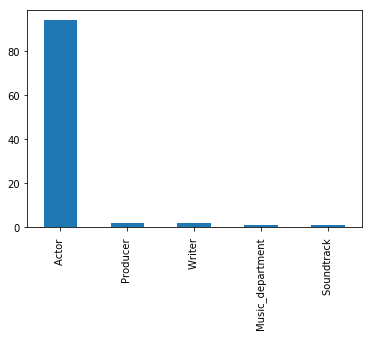

In [9]:
%matplotlib inline
df = pd.DataFrame(rows1)
df.Role.value_counts().plot.bar()